In [1]:
import pandas as pd
import h5py

# Define the path to the HDF5 file
filename = "/Users/Sophia/hdf5/bands/20231025-102003.hdf5"

with h5py.File(filename, 'r') as f:
    eeg_bands = f['eeg/bands/table'][:]

In [2]:
print(eeg_bands.shape)
print(eeg_bands.dtype)


(16,)
[('index', '<i8'), ('values_block_0', '<f8', (130,))]


In [3]:
print(eeg_bands['values_block_0'][:5])


[[3.63748249e+01 2.02262288e+01 3.04339678e+01 3.12931234e+01
  5.29040402e+01 4.25608064e+01 1.83208668e+01 1.54740897e+01
  1.55974314e+01 1.60347450e+01 5.23714126e+01 1.55368213e+02
  1.06305691e+02 6.49712051e+01 9.43149079e+01 1.31723756e+02
  7.18573078e+01 6.84612290e+01 6.53905848e+01 6.79294888e+01
  7.96708398e+01 7.08181498e+01 6.01672940e+01 4.61229451e+01
  2.21815566e+01 3.16078396e+01 2.89747371e+01 2.70199042e+01
  1.21629068e+01 4.00716639e+00 6.36561061e+00 2.13100042e+01
  4.02848713e+01 3.16452830e+01 2.70243614e+01 2.18169177e+01
  2.05921189e+01 2.22354968e+01 2.19061092e+01 2.32708426e+01
  2.53648870e+01 2.34371224e+01 1.87199133e+01 3.79518515e+01
  3.83168545e+01 2.90463919e+01 4.34015418e+01 4.40322730e+01
  2.95923175e+01 2.69544583e+01 2.56267116e+01 2.55463053e+01
  2.43544751e+01 2.02747496e+01 2.13323204e+01 2.09535583e+01
  1.92354039e+01 5.25634722e+01 3.35593497e+01 2.77764418e+01
  1.96388124e+01 1.98119659e+01 2.01385293e+01 4.22401516e+01
  4.3141

In [4]:
import numpy as np

index_data = eeg_bands['index']
values_data = np.array([item[0] for item in eeg_bands['values_block_0']])

df = pd.DataFrame({
    'index': index_data,
    'values_block_0': values_data
})

print(df.head())


                 index  values_block_0
0  1698229205441620736       36.374825
1  1698229205942405888       28.607588
2  1698229206442936064       31.038714
3  1698229206943300608       34.397707
4  1698229207443591168       41.108438


In [5]:
# inspecting structure/hierarchy 
with h5py.File(filename, 'r') as f:
    def print_structure(name, obj):
        print(name)
    f.visititems(print_structure)


eeg
eeg/bands
eeg/bands/_i_table
eeg/bands/_i_table/index
eeg/bands/_i_table/index/abounds
eeg/bands/_i_table/index/bounds
eeg/bands/_i_table/index/indices
eeg/bands/_i_table/index/indicesLR
eeg/bands/_i_table/index/mbounds
eeg/bands/_i_table/index/mranges
eeg/bands/_i_table/index/ranges
eeg/bands/_i_table/index/sorted
eeg/bands/_i_table/index/sortedLR
eeg/bands/_i_table/index/zbounds
eeg/bands/table


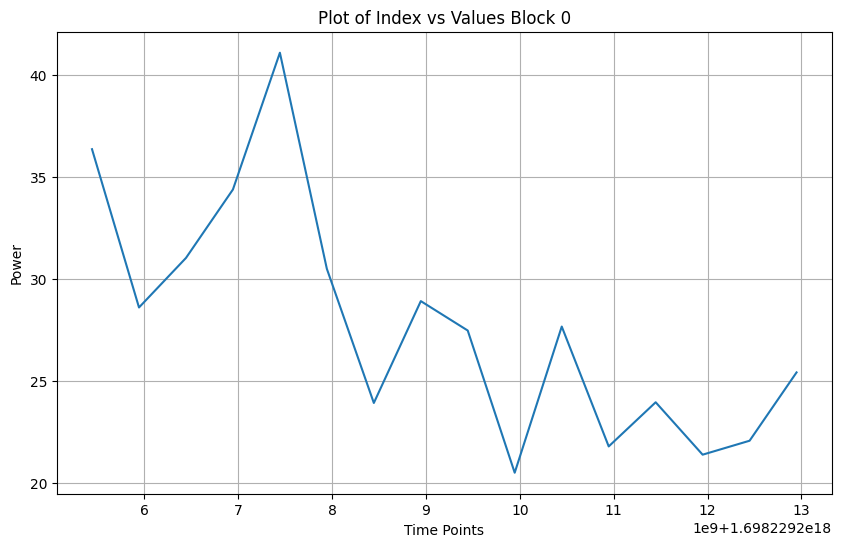

In [6]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['index'], df['values_block_0'])
plt.xlabel('Time Points')
plt.ylabel('Power')
plt.title('Plot of Index vs Values Block 0')
plt.grid(True)
plt.show()